In [1]:
import numpy as np
import matplotlib.pyplot as plt

# arm_input_train_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/pressure_only/train_inputdata.npy')
# arm_output_train_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/pressure_only/train_outputdata.npy')
# arm_input_validation_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/pressure_only/validation_inputdata.npy')
# arm_output_validation_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/pressure_only/validation_outputdata.npy')

arm_input_train_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/smoothed_data/train_inputdata.npy')
arm_output_train_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/smoothed_data/train_outputdata.npy')
arm_input_validation_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/smoothed_data/validation_inputdata.npy')
arm_output_validation_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/smoothed_data/validation_outputdata.npy')

# arm_input_train_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/train_inputdata.npy')
# arm_output_train_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/train_outputdata.npy')
# arm_input_validation_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/validation_inputdata.npy')
# arm_output_validation_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/validation_outputdata.npy')

# arm_input_train_data = np.load("/home/daniel/Documents/data/daniel_baloo_data_collection/STEPCMDS/parsed_csvs/smooth_all_inputs_normalized_filtered.npy")

print(arm_input_train_data.shape)

print(arm_output_train_data.shape)
print(arm_input_validation_data.shape)
print(arm_output_validation_data.shape)

(1346979, 36)
(1346979, 24)
(336745, 36)
(336745, 24)


In [8]:
# dither the data
arm_input_train_data[:, :24] *= (1 + np.random.normal(0, 0.05, (arm_input_train_data.shape[0], 24)))
arm_input_validation_data[:, :24] *= (1 + np.random.normal(0, 0.05, (arm_input_validation_data.shape[0], 24)))

np.save('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/train_inputdata.npy', arm_input_train_data)
np.save('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/validation_inputdata.npy', arm_input_validation_data)


In [6]:
# save only the pressure data
np.save('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/train_inputdata.npy', arm_input_train_data[:, [0, 24]])
np.save('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/train_outputdata.npy', arm_output_train_data[:, 0].reshape(-1, 1))
np.save('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/validation_inputdata.npy', arm_input_validation_data[:, [0, 24]])
np.save('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/validation_outputdata.npy', arm_output_validation_data[:, 0].reshape(-1, 1))

In [ ]:
# save as float32
arm_input_train_data = arm_input_train_data.astype(np.float32)
arm_output_train_data = arm_output_train_data.astype(np.float32)
arm_input_validation_data = arm_input_validation_data.astype(np.float32)
arm_output_validation_data = arm_output_validation_data.astype(np.float32)

np.save('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/train_inputdata.npy', arm_input_train_data)
np.save('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/train_outputdata.npy', arm_output_train_data)
np.save('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/validation_inputdata.npy', arm_input_validation_data)
np.save('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/validation_outputdata.npy', arm_output_validation_data)


In [2]:
# smooth the data with 
from scipy.signal import sosfiltfilt, butter

cutoff_freq = 1.0
sos = butter(7, cutoff_freq, output='sos', fs=100)

filtered_input_train_data = np.zeros(arm_input_train_data.shape)
filtered_input_validation_data = np.zeros(arm_input_validation_data.shape)

filtered_input_train_data[:, :24] = sosfiltfilt(sos, arm_input_train_data[:, :24], axis=0)
filtered_input_validation_data[:, :24] = sosfiltfilt(sos, arm_input_validation_data[:, :24], axis=0)

# filtered_input_train_data[:, :12] = arm_input_train_data[:, :12]
# filtered_input_validation_data[:, :12] = arm_input_validation_data[:, :12]

filtered_input_train_data[:, 24:] = arm_input_train_data[:, 24:]
filtered_input_validation_data[:, 24:] = arm_input_validation_data[:, 24:]

# np.save('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/train_inputdata.npy', filtered_input_train_data)
# np.save('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/train_outputdata.npy', arm_output_train_data)
# np.save('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/validation_inputdata.npy', filtered_input_validation_data)
# np.save('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/validation_outputdata.npy', arm_output_validation_data)

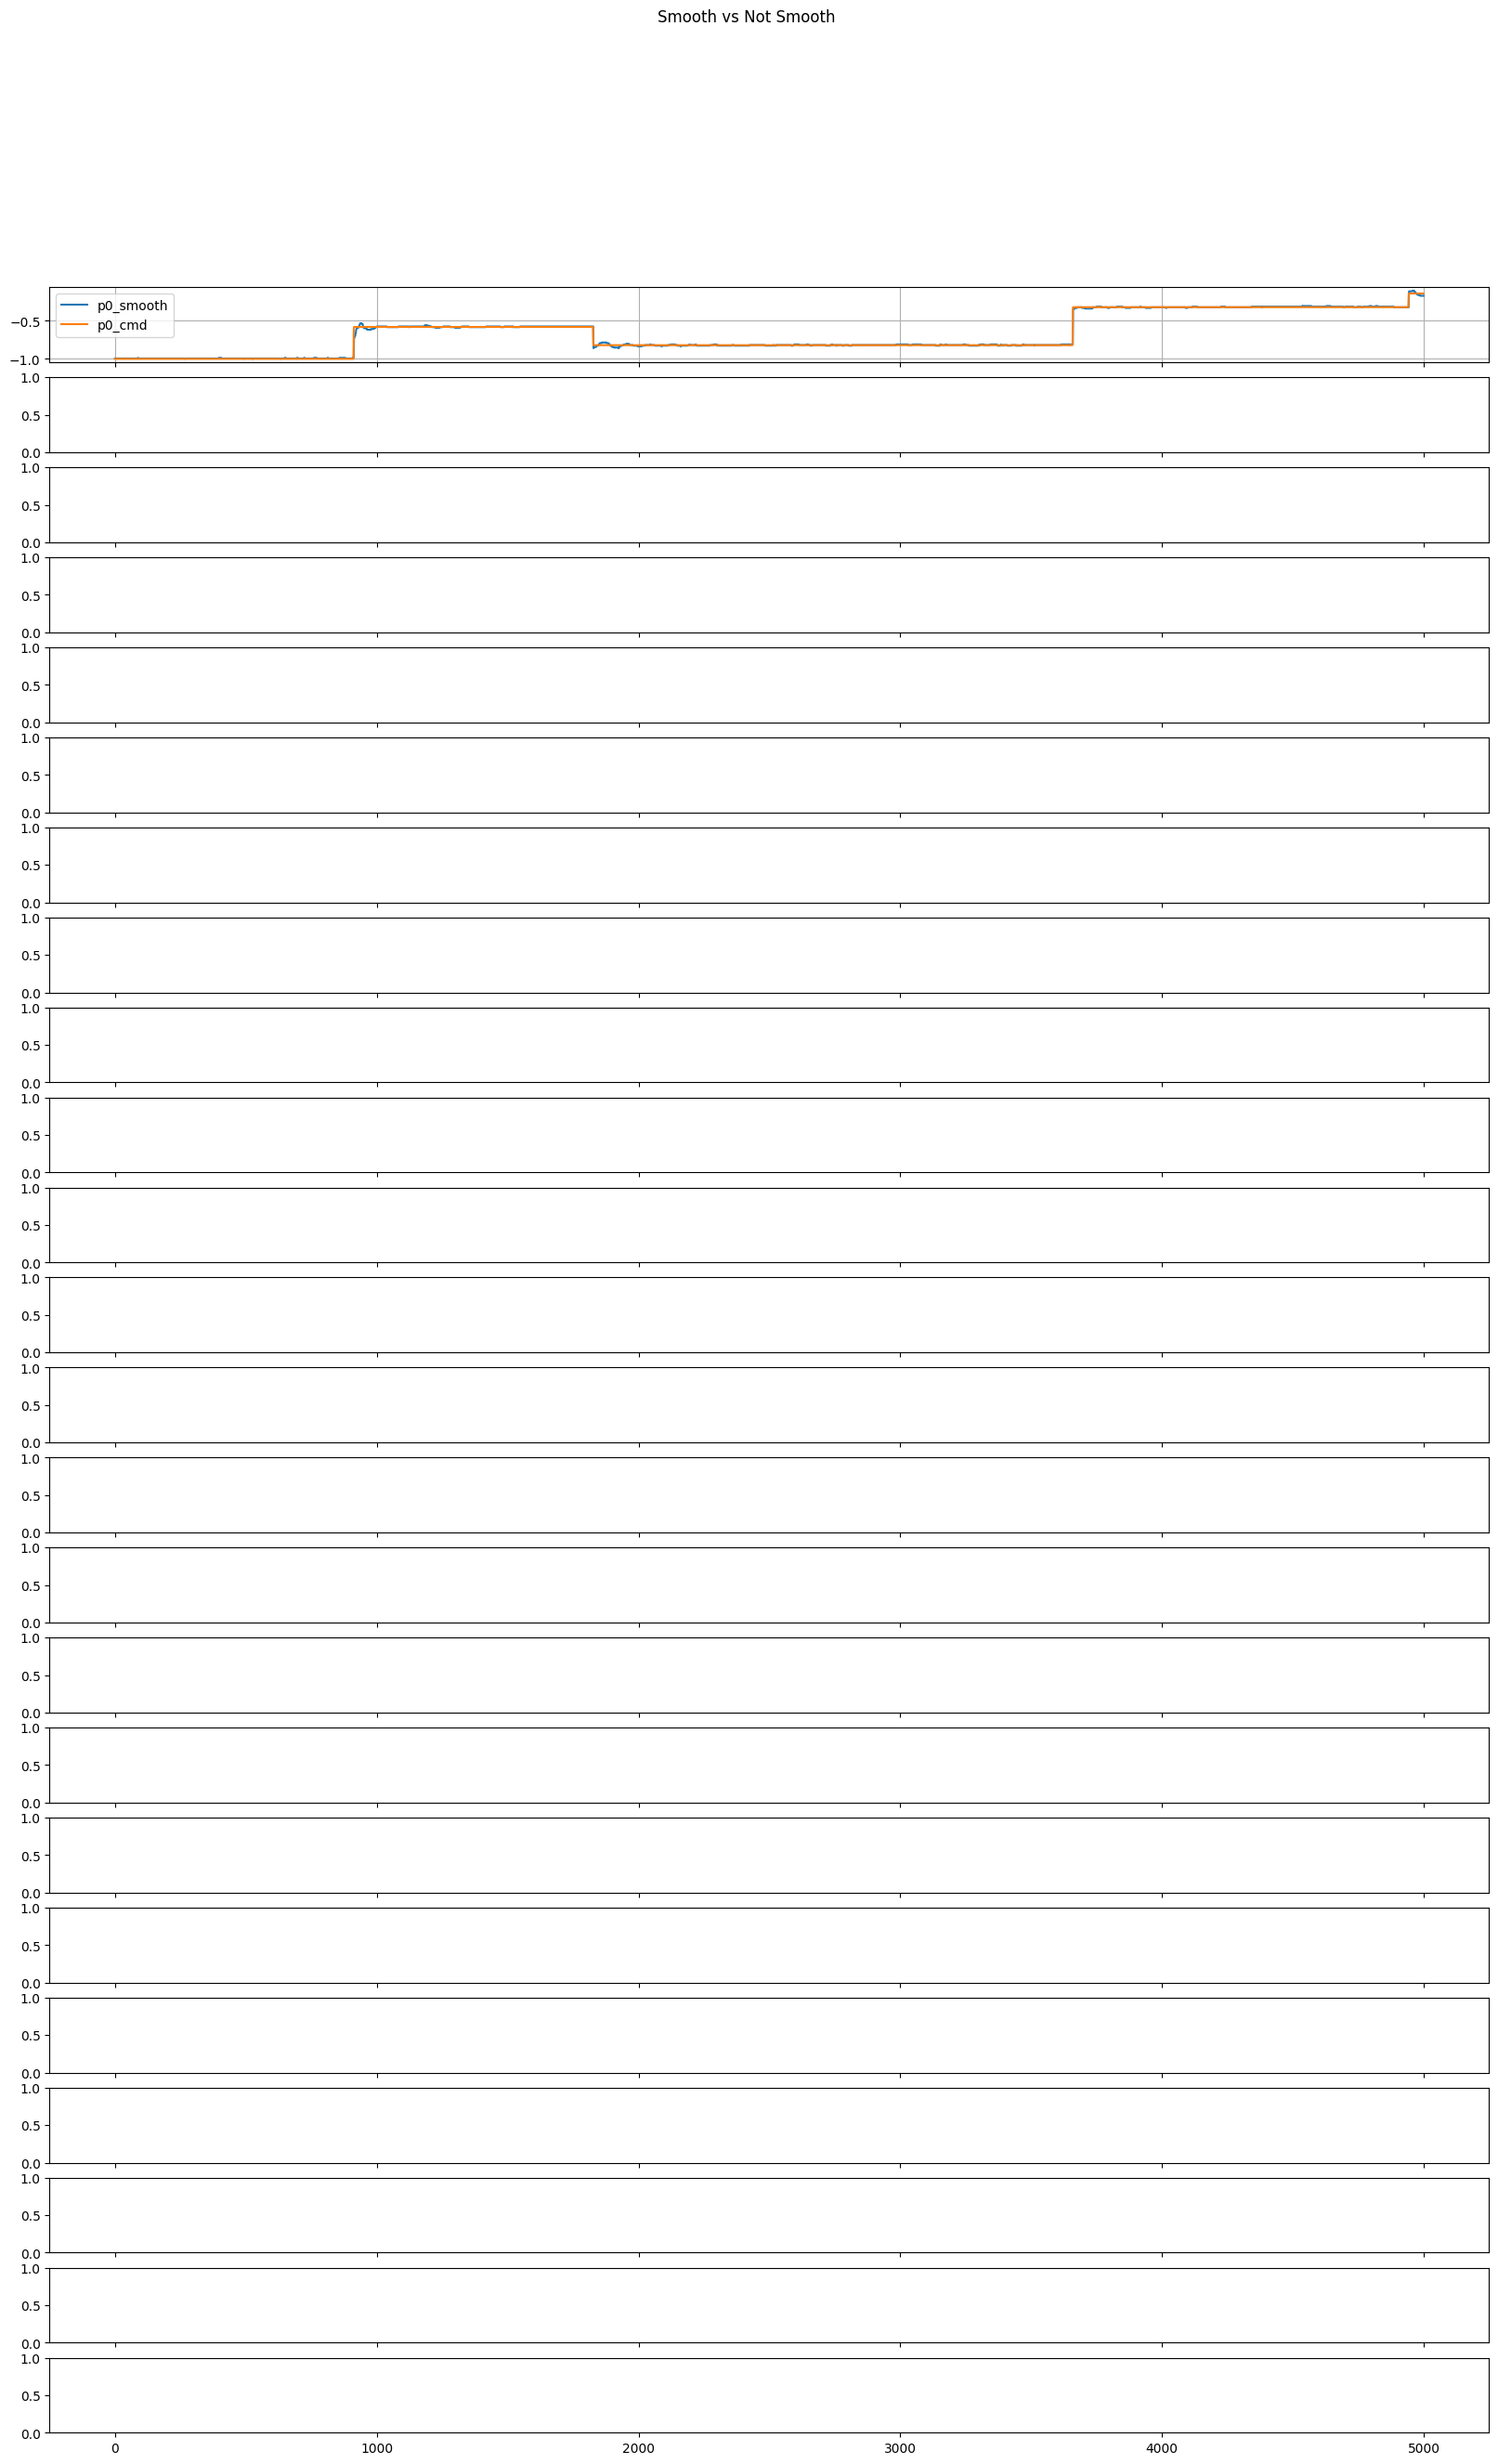

In [9]:
# plot all of the states to compare smooth and not smooth
import matplotlib.pyplot as plt
import numpy as np

start_ind = 0
end_ind = 5000

path_to_save = "/home/daniel/Documents/data/daniel_baloo_data_collection/STAR/parsed_csvs"
# path_to_save = "/home/daniel/Documents/data/daniel_baloo_data_collection/CIRCLES/parsed_csvs"

# smooth_all_inputs = np.load(path_to_save+"/smooth_all_inputs.npy")
# smooth_all_outputs = np.load(path_to_save+"/smooth_all_outputs.npy")


smooth_all_inputs = arm_input_validation_data
smooth_all_outputs = arm_output_train_data

fig, axs = plt.subplots(24, 1, sharex=True, figsize=(20, 30))
fig.suptitle('Smooth vs Not Smooth')
labels = ["p0", "p1", "p2", "p3", "p4", "p5", "p6", "p7", "p8", "p9", "p10", "p11", "udot0", "vdot0", "udot1", "vdot1", "udot2", "vdot2", "u0", "v0", "u1", "v1", "u2", "v2"]

for i in range(1):
    # axs[i].plot(not_smooth_all_inputs[start_ind:end_ind, i], label=f"{labels[i]}_not_smooth")
    axs[i].plot(smooth_all_inputs[start_ind:end_ind, i], label=f"{labels[i]}_smooth")
    axs[i].plot(smooth_all_inputs[start_ind:end_ind, i+1], label=f"{labels[i]}_cmd")
    axs[i].legend()
    axs[i].grid()

# for i in range(12, 24):
#     # axs[i].plot(not_smooth_all_inputs[start_ind:end_ind, i], label=f"{labels[i]}_not_smooth")
#     axs[i].plot(smooth_all_inputs[start_ind:end_ind, i], label=f"{labels[i]}_smooth")
#     axs[i].legend()
#     axs[i].grid()

In [6]:
print("Training Inputs")
print(f"p0: min: {np.min(arm_input_train_data[:,0])}, max: {np.max(arm_input_train_data[:,0])}, mean: {np.mean(arm_input_train_data[:,0])}, std: {np.std(arm_input_train_data[:,0])}")
print(f"p1: min: {np.min(arm_input_train_data[:,1])}, max: {np.max(arm_input_train_data[:,1])}, mean: {np.mean(arm_input_train_data[:,1])}, std: {np.std(arm_input_train_data[:,1])}")
print(f"p2: min: {np.min(arm_input_train_data[:,2])}, max: {np.max(arm_input_train_data[:,2])}, mean: {np.mean(arm_input_train_data[:,2])}, std: {np.std(arm_input_train_data[:,2])}")
print(f"p3: min: {np.min(arm_input_train_data[:,3])}, max: {np.max(arm_input_train_data[:,3])}, mean: {np.mean(arm_input_train_data[:,3])}, std: {np.std(arm_input_train_data[:,3])}")
print(f"p4: min: {np.min(arm_input_train_data[:,4])}, max: {np.max(arm_input_train_data[:,4])}, mean: {np.mean(arm_input_train_data[:,4])}, std: {np.std(arm_input_train_data[:,4])}")
print(f"p5: min: {np.min(arm_input_train_data[:,5])}, max: {np.max(arm_input_train_data[:,5])}, mean: {np.mean(arm_input_train_data[:,5])}, std: {np.std(arm_input_train_data[:,5])}")
print(f"p6: min: {np.min(arm_input_train_data[:,6])}, max: {np.max(arm_input_train_data[:,6])}, mean: {np.mean(arm_input_train_data[:,6])}, std: {np.std(arm_input_train_data[:,6])}")
print(f"p7: min: {np.min(arm_input_train_data[:,7])}, max: {np.max(arm_input_train_data[:,7])}, mean: {np.mean(arm_input_train_data[:,7])}, std: {np.std(arm_input_train_data[:,7])}")
print(f"p8: min: {np.min(arm_input_train_data[:,8])}, max: {np.max(arm_input_train_data[:,8])}, mean: {np.mean(arm_input_train_data[:,8])}, std: {np.std(arm_input_train_data[:,8])}")
print(f"p9: min: {np.min(arm_input_train_data[:,9])}, max: {np.max(arm_input_train_data[:,9])}, mean: {np.mean(arm_input_train_data[:,9])}, std: {np.std(arm_input_train_data[:,9])}")
print(f"p10: min: {np.min(arm_input_train_data[:,10])}, max: {np.max(arm_input_train_data[:,10])}, mean: {np.mean(arm_input_train_data[:,10])}, std: {np.std(arm_input_train_data[:,10])}")
print(f"p11: min: {np.min(arm_input_train_data[:,11])}, max: {np.max(arm_input_train_data[:,11])}, mean: {np.mean(arm_input_train_data[:,11])}, std: {np.std(arm_input_train_data[:,11])}")
print(f"u0_dot: min: {np.min(arm_input_train_data[:,12])}, max: {np.max(arm_input_train_data[:,12])}, mean: {np.mean(arm_input_train_data[:,12])}, std: {np.std(arm_input_train_data[:,12])}")
print(f"v0_dot: min: {np.min(arm_input_train_data[:,13])}, max: {np.max(arm_input_train_data[:,13])}, mean: {np.mean(arm_input_train_data[:,13])}, std: {np.std(arm_input_train_data[:,13])}")
print(f"u1_dot: min: {np.min(arm_input_train_data[:,14])}, max: {np.max(arm_input_train_data[:,14])}, mean: {np.mean(arm_input_train_data[:,14])}, std: {np.std(arm_input_train_data[:,14])}")
print(f"v1_dot: min: {np.min(arm_input_train_data[:,15])}, max: {np.max(arm_input_train_data[:,15])}, mean: {np.mean(arm_input_train_data[:,15])}, std: {np.std(arm_input_train_data[:,15])}")
print(f"u2_dot: min: {np.min(arm_input_train_data[:,16])}, max: {np.max(arm_input_train_data[:,16])}, mean: {np.mean(arm_input_train_data[:,16])}, std: {np.std(arm_input_train_data[:,16])}")
print(f"v2_dot: min: {np.min(arm_input_train_data[:,17])}, max: {np.max(arm_input_train_data[:,17])}, mean: {np.mean(arm_input_train_data[:,17])}, std: {np.std(arm_input_train_data[:,17])}")
print(f"u0: min: {np.min(arm_input_train_data[:,18])}, max: {np.max(arm_input_train_data[:,18])}, mean: {np.mean(arm_input_train_data[:,18])}, std: {np.std(arm_input_train_data[:,18])}")
print(f"v0: min: {np.min(arm_input_train_data[:,19])}, max: {np.max(arm_input_train_data[:,19])}, mean: {np.mean(arm_input_train_data[:,19])}, std: {np.std(arm_input_train_data[:,19])}")
print(f"u1: min: {np.min(arm_input_train_data[:,20])}, max: {np.max(arm_input_train_data[:,20])}, mean: {np.mean(arm_input_train_data[:,20])}, std: {np.std(arm_input_train_data[:,20])}")
print(f"v1: min: {np.min(arm_input_train_data[:,21])}, max: {np.max(arm_input_train_data[:,21])}, mean: {np.mean(arm_input_train_data[:,21])}, std: {np.std(arm_input_train_data[:,21])}")
print(f"u2: min: {np.min(arm_input_train_data[:,22])}, max: {np.max(arm_input_train_data[:,22])}, mean: {np.mean(arm_input_train_data[:,22])}, std: {np.std(arm_input_train_data[:,22])}")
print(f"v2: min: {np.min(arm_input_train_data[:,23])}, max: {np.max(arm_input_train_data[:,23])}, mean: {np.mean(arm_input_train_data[:,23])}, std: {np.std(arm_input_train_data[:,23])}")
# print(f"p0_cmd: min: {np.min(arm_input_train_data[:,24])}, max: {np.max(arm_input_train_data[:,24])}, mean: {np.mean(arm_input_train_data[:,24])}, std: {np.std(arm_input_train_data[:,24])}")
# print(f"p1_cmd: min: {np.min(arm_input_train_data[:,25])}, max: {np.max(arm_input_train_data[:,25])}, mean: {np.mean(arm_input_train_data[:,25])}, std: {np.std(arm_input_train_data[:,25])}")
# print(f"p2_cmd: min: {np.min(arm_input_train_data[:,26])}, max: {np.max(arm_input_train_data[:,26])}, mean: {np.mean(arm_input_train_data[:,26])}, std: {np.std(arm_input_train_data[:,26])}")
# print(f"p3_cmd: min: {np.min(arm_input_train_data[:,27])}, max: {np.max(arm_input_train_data[:,27])}, mean: {np.mean(arm_input_train_data[:,27])}, std: {np.std(arm_input_train_data[:,27])}")
# print(f"p4_cmd: min: {np.min(arm_input_train_data[:,28])}, max: {np.max(arm_input_train_data[:,28])}, mean: {np.mean(arm_input_train_data[:,28])}, std: {np.std(arm_input_train_data[:,28])}")
# print(f"p5_cmd: min: {np.min(arm_input_train_data[:,29])}, max: {np.max(arm_input_train_data[:,29])}, mean: {np.mean(arm_input_train_data[:,29])}, std: {np.std(arm_input_train_data[:,29])}")
# print(f"p6_cmd: min: {np.min(arm_input_train_data[:,30])}, max: {np.max(arm_input_train_data[:,30])}, mean: {np.mean(arm_input_train_data[:,30])}, std: {np.std(arm_input_train_data[:,30])}")
# print(f"p7_cmd: min: {np.min(arm_input_train_data[:,31])}, max: {np.max(arm_input_train_data[:,31])}, mean: {np.mean(arm_input_train_data[:,31])}, std: {np.std(arm_input_train_data[:,31])}")
# print(f"p8_cmd: min: {np.min(arm_input_train_data[:,32])}, max: {np.max(arm_input_train_data[:,32])}, mean: {np.mean(arm_input_train_data[:,32])}, std: {np.std(arm_input_train_data[:,32])}")
# print(f"p9_cmd: min: {np.min(arm_input_train_data[:,33])}, max: {np.max(arm_input_train_data[:,33])}, mean: {np.mean(arm_input_train_data[:,33])}, std: {np.std(arm_input_train_data[:,33])}")
# print(f"p10_cmd: min: {np.min(arm_input_train_data[:,34])}, max: {np.max(arm_input_train_data[:,34])}, mean: {np.mean(arm_input_train_data[:,34])}, std: {np.std(arm_input_train_data[:,34])}")
# print(f"p11_cmd: min: {np.min(arm_input_train_data[:,35])}, max: {np.max(arm_input_train_data[:,35])}, mean: {np.mean(arm_input_train_data[:,35])}, std: {np.std(arm_input_train_data[:,35])}")

Training Inputs
p0: min: -0.0010243479650641047, max: 1.0290880518841024, mean: 0.5866105873558868, std: 0.3572605592900735
p1: min: -0.0001927296289617242, max: 1.0000018334299592, mean: 0.40381203090526724, std: 0.2742224537973125
p2: min: -0.002678650761233692, max: 1.0480314856375368, mean: 0.5655361620165446, std: 0.3657548467846437
p3: min: -0.001007140109499552, max: 0.9998639438481434, mean: 0.42051568411238716, std: 0.2760641773772083
p4: min: -0.001171897566417398, max: 0.9881927133290516, mean: 0.4114592719123406, std: 0.27648473758604836
p5: min: -0.0009482468004576517, max: 0.9848199305124452, mean: 0.4130960956415853, std: 0.2692655962023288
p6: min: -0.0021198605332258245, max: 0.9910868598133394, mean: 0.40704550556271657, std: 0.2664960032629847
p7: min: -0.000283048449312302, max: 0.9916019311720418, mean: 0.4113263328632642, std: 0.27314113515797295
p8: min: 0.007339175512394964, max: 1.0084837667953128, mean: 0.41232816639614234, std: 0.2692615543378725
p9: min: -0.

In [7]:
print(f"p0_cmd: min: {np.min(arm_input_train_data[:,12])}, max: {np.max(arm_input_train_data[:,12])}, mean: {np.mean(arm_input_train_data[:,12])}, std: {np.std(arm_input_train_data[:,12])}")
print(f"p1_cmd: min: {np.min(arm_input_train_data[:,13])}, max: {np.max(arm_input_train_data[:,13])}, mean: {np.mean(arm_input_train_data[:,13])}, std: {np.std(arm_input_train_data[:,13])}")
print(f"p2_cmd: min: {np.min(arm_input_train_data[:,14])}, max: {np.max(arm_input_train_data[:,14])}, mean: {np.mean(arm_input_train_data[:,14])}, std: {np.std(arm_input_train_data[:,14])}")
print(f"p3_cmd: min: {np.min(arm_input_train_data[:,15])}, max: {np.max(arm_input_train_data[:,15])}, mean: {np.mean(arm_input_train_data[:,15])}, std: {np.std(arm_input_train_data[:,15])}")
print(f"p4_cmd: min: {np.min(arm_input_train_data[:,16])}, max: {np.max(arm_input_train_data[:,16])}, mean: {np.mean(arm_input_train_data[:,16])}, std: {np.std(arm_input_train_data[:,16])}")
print(f"p5_cmd: min: {np.min(arm_input_train_data[:,17])}, max: {np.max(arm_input_train_data[:,17])}, mean: {np.mean(arm_input_train_data[:,17])}, std: {np.std(arm_input_train_data[:,17])}")
print(f"p6_cmd: min: {np.min(arm_input_train_data[:,18])}, max: {np.max(arm_input_train_data[:,18])}, mean: {np.mean(arm_input_train_data[:,18])}, std: {np.std(arm_input_train_data[:,18])}")
print(f"p7_cmd: min: {np.min(arm_input_train_data[:,19])}, max: {np.max(arm_input_train_data[:,19])}, mean: {np.mean(arm_input_train_data[:,19])}, std: {np.std(arm_input_train_data[:,19])}")
print(f"p8_cmd: min: {np.min(arm_input_train_data[:,20])}, max: {np.max(arm_input_train_data[:,20])}, mean: {np.mean(arm_input_train_data[:,20])}, std: {np.std(arm_input_train_data[:,20])}")
print(f"p9_cmd: min: {np.min(arm_input_train_data[:,21])}, max: {np.max(arm_input_train_data[:,21])}, mean: {np.mean(arm_input_train_data[:,21])}, std: {np.std(arm_input_train_data[:,21])}")
print(f"p10_cmd: min: {np.min(arm_input_train_data[:,22])}, max: {np.max(arm_input_train_data[:,22])}, mean: {np.mean(arm_input_train_data[:,22])}, std: {np.std(arm_input_train_data[:,22])}")
print(f"p11_cmd: min: {np.min(arm_input_train_data[:,23])}, max: {np.max(arm_input_train_data[:,23])}, mean: {np.mean(arm_input_train_data[:,23])}, std: {np.std(arm_input_train_data[:,23])}")

p0_cmd: min: -0.17818500193238845, max: 0.1783222830736118, mean: 0.00020750710992818995, std: 0.01642548391262835
p1_cmd: min: -0.1763899136933611, max: 0.17768821580484825, mean: 0.00025958332073527327, std: 0.016987263086112384
p2_cmd: min: -0.2363849346333052, max: 0.23639923710630714, mean: 6.226261930727476e-05, std: 0.017749304514135478
p3_cmd: min: -0.23820287620831487, max: 0.23965169658804958, mean: -0.0001713487087749185, std: 0.01774217157048101
p4_cmd: min: -0.24576056465988283, max: 0.2463754103458303, mean: -0.00021224132521957168, std: 0.03139154415736589
p5_cmd: min: -0.24997727692290037, max: 0.24757466773676665, mean: 0.00013012794960180296, std: 0.030049382863318052
p6_cmd: min: -0.6103638033666348, max: 0.4324173372537361, mean: -0.11324569127225972, std: 0.23102437892451957
p7_cmd: min: -0.6400093493138542, max: 0.41684693676272805, mean: -0.14202089503613613, std: 0.22016137541337769
p8_cmd: min: -0.75844439341388, max: 0.7088877665752351, mean: -0.21326412284262

In [8]:
# check min/max of the outputs
print("Training Outputs")
print(f"p0: min: {np.min(arm_output_train_data[:,0])}, max: {np.max(arm_output_train_data[:,0])}, mean: {np.mean(arm_output_train_data[:,0])}, std: {np.std(arm_output_train_data[:,0])}")
print(f"p1: min: {np.min(arm_output_train_data[:,1])}, max: {np.max(arm_output_train_data[:,1])}, mean: {np.mean(arm_output_train_data[:,1])}, std: {np.std(arm_output_train_data[:,1])}")
print(f"p2: min: {np.min(arm_output_train_data[:,2])}, max: {np.max(arm_output_train_data[:,2])}, mean: {np.mean(arm_output_train_data[:,2])}, std: {np.std(arm_output_train_data[:,2])}")
print(f"p3: min: {np.min(arm_output_train_data[:,3])}, max: {np.max(arm_output_train_data[:,3])}, mean: {np.mean(arm_output_train_data[:,3])}, std: {np.std(arm_output_train_data[:,3])}")
print(f"p4: min: {np.min(arm_output_train_data[:,4])}, max: {np.max(arm_output_train_data[:,4])}, mean: {np.mean(arm_output_train_data[:,4])}, std: {np.std(arm_output_train_data[:,4])}")
print(f"p5: min: {np.min(arm_output_train_data[:,5])}, max: {np.max(arm_output_train_data[:,5])}, mean: {np.mean(arm_output_train_data[:,5])}, std: {np.std(arm_output_train_data[:,5])}")
print(f"p6: min: {np.min(arm_output_train_data[:,6])}, max: {np.max(arm_output_train_data[:,6])}, mean: {np.mean(arm_output_train_data[:,6])}, std: {np.std(arm_output_train_data[:,6])}")
print(f"p7: min: {np.min(arm_output_train_data[:,7])}, max: {np.max(arm_output_train_data[:,7])}, mean: {np.mean(arm_output_train_data[:,7])}, std: {np.std(arm_output_train_data[:,7])}")
print(f"p8: min: {np.min(arm_output_train_data[:,8])}, max: {np.max(arm_output_train_data[:,8])}, mean: {np.mean(arm_output_train_data[:,8])}, std: {np.std(arm_output_train_data[:,8])}")
print(f"p9: min: {np.min(arm_output_train_data[:,9])}, max: {np.max(arm_output_train_data[:,9])}, mean: {np.mean(arm_output_train_data[:,9])}, std: {np.std(arm_output_train_data[:,9])}")
print(f"p10: min: {np.min(arm_output_train_data[:,10])}, max: {np.max(arm_output_train_data[:,10])}, mean: {np.mean(arm_output_train_data[:,10])}, std: {np.std(arm_output_train_data[:,10])}")
print(f"p11: min: {np.min(arm_output_train_data[:,11])}, max: {np.max(arm_output_train_data[:,11])}, mean: {np.mean(arm_output_train_data[:,11])}, std: {np.std(arm_output_train_data[:,11])}")
print(f"u0_dot: min: {np.min(arm_output_train_data[:,12])}, max: {np.max(arm_output_train_data[:,12])}, mean: {np.mean(arm_output_train_data[:,12])}, std: {np.std(arm_output_train_data[:,12])}")
print(f"v0_dot: min: {np.min(arm_output_train_data[:,13])}, max: {np.max(arm_output_train_data[:,13])}, mean: {np.mean(arm_output_train_data[:,13])}, std: {np.std(arm_output_train_data[:,13])}")
print(f"u1_dot: min: {np.min(arm_output_train_data[:,14])}, max: {np.max(arm_output_train_data[:,14])}, mean: {np.mean(arm_output_train_data[:,14])}, std: {np.std(arm_output_train_data[:,14])}")
print(f"v1_dot: min: {np.min(arm_output_train_data[:,15])}, max: {np.max(arm_output_train_data[:,15])}, mean: {np.mean(arm_output_train_data[:,15])}, std: {np.std(arm_output_train_data[:,15])}")
print(f"u2_dot: min: {np.min(arm_output_train_data[:,16])}, max: {np.max(arm_output_train_data[:,16])}, mean: {np.mean(arm_output_train_data[:,16])}, std: {np.std(arm_output_train_data[:,16])}")
print(f"v2_dot: min: {np.min(arm_output_train_data[:,17])}, max: {np.max(arm_output_train_data[:,17])}, mean: {np.mean(arm_output_train_data[:,17])}, std: {np.std(arm_output_train_data[:,17])}")
print(f"u0: min: {np.min(arm_output_train_data[:,18])}, max: {np.max(arm_output_train_data[:,18])}, mean: {np.mean(arm_output_train_data[:,18])}, std: {np.std(arm_output_train_data[:,18])}")
print(f"v0: min: {np.min(arm_output_train_data[:,19])}, max: {np.max(arm_output_train_data[:,19])}, mean: {np.mean(arm_output_train_data[:,19])}, std: {np.std(arm_output_train_data[:,19])}")
print(f"u1: min: {np.min(arm_output_train_data[:,20])}, max: {np.max(arm_output_train_data[:,20])}, mean: {np.mean(arm_output_train_data[:,20])}, std: {np.std(arm_output_train_data[:,20])}")
print(f"v1: min: {np.min(arm_output_train_data[:,21])}, max: {np.max(arm_output_train_data[:,21])}, mean: {np.mean(arm_output_train_data[:,21])}, std: {np.std(arm_output_train_data[:,21])}")
print(f"u2: min: {np.min(arm_output_train_data[:,22])}, max: {np.max(arm_output_train_data[:,22])}, mean: {np.mean(arm_output_train_data[:,22])}, std: {np.std(arm_output_train_data[:,22])}")
print(f"v2: min: {np.min(arm_output_train_data[:,23])}, max: {np.max(arm_output_train_data[:,23])}, mean: {np.mean(arm_output_train_data[:,23])}, std: {np.std(arm_output_train_data[:,23])}")

Training Outputs
p0: min: -0.23627320448656317, max: 0.23771599960168052, mean: 0.0008016944899708468, std: 0.014721438437657684
p1: min: -0.2230679004439476, max: 0.2241278574134754, mean: 0.00030398307619680057, std: 0.011359077017211863
p2: min: -0.34101257751955366, max: 0.34556633824434485, mean: 0.001138062300293397, std: 0.023671070951767143
p3: min: -0.17874960152218541, max: 0.18015369819547014, mean: 0.00017524897314425246, std: 0.009280163588398326
p4: min: -0.2793156761295873, max: 0.2806004339919373, mean: 0.00031128297522715957, std: 0.010875819075725523
p5: min: -0.30551090014868915, max: 0.3176259726788218, mean: 0.0003352613797040277, std: 0.011862787389220687
p6: min: -0.2642459791422077, max: 0.26487375383058465, mean: 0.00026930947055395964, std: 0.010382407396384269
p7: min: -0.3206587968173611, max: 0.3216396851601023, mean: 0.00039836295223895585, std: 0.013873080648677169
p8: min: -0.45098897155957357, max: 0.45228558810545044, mean: -0.000559506010679757, std: 

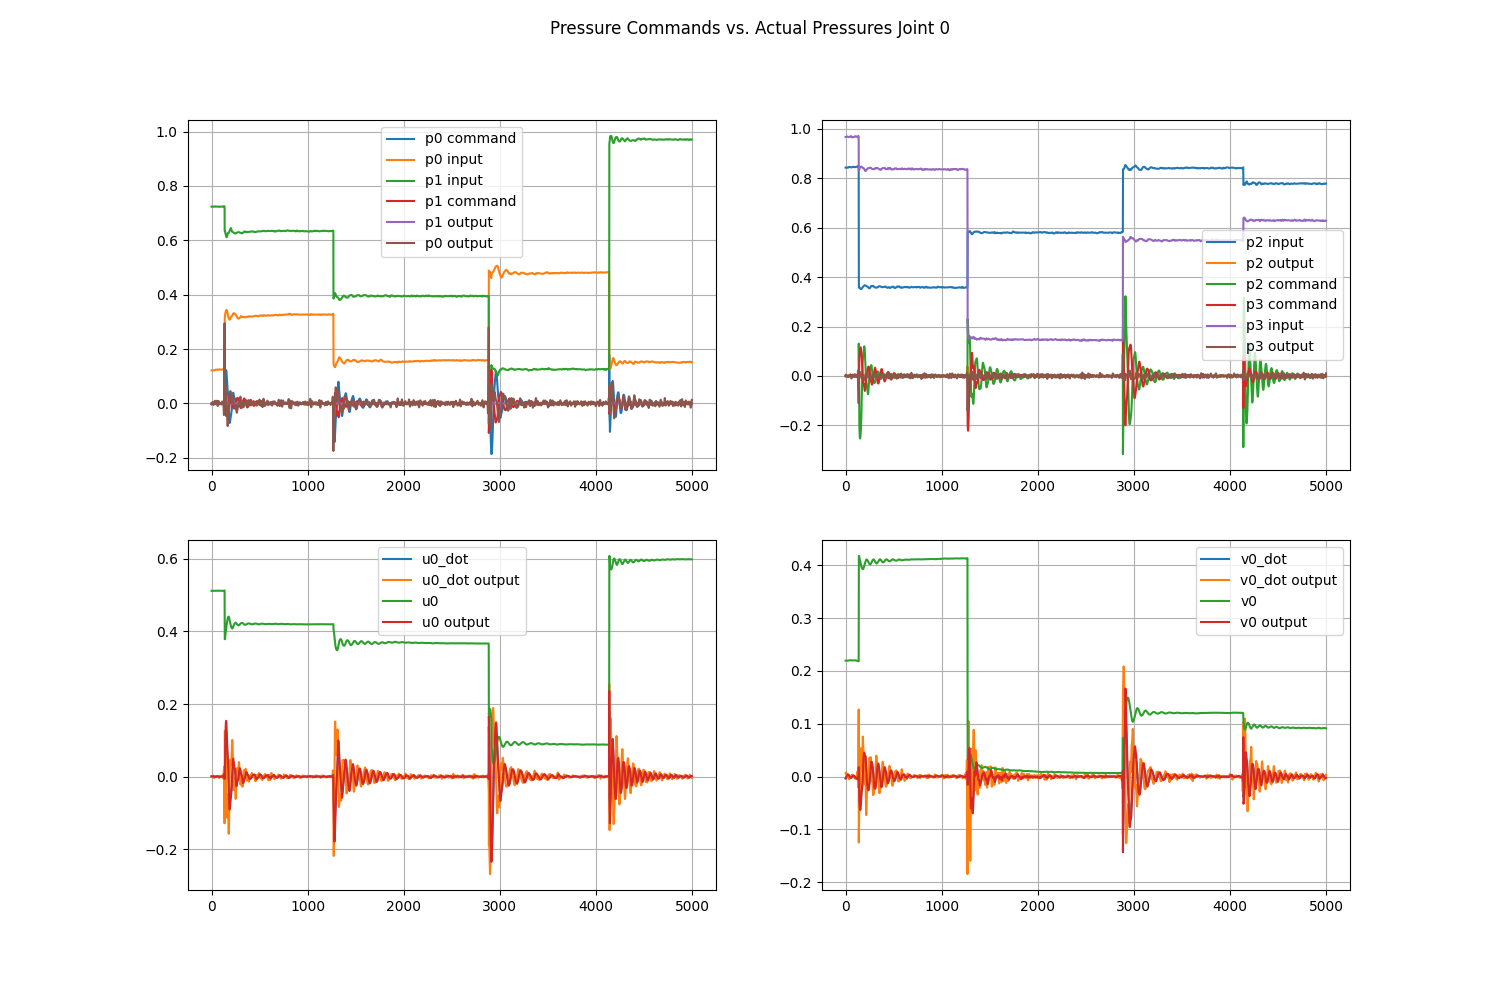

In [2]:
%matplotlib widget

start = 30000
end = 35000

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 10)
fig.suptitle('Pressure Commands vs. Actual Pressures Joint 0')
axs[0, 0].plot(arm_input_train_data[start:end,12], label='p0 command')
axs[0, 0].plot(arm_input_train_data[start:end,0], label='p0 input')

axs[0, 0].plot(arm_input_train_data[start:end,1], label='p1 input')
axs[0, 0].plot(arm_input_train_data[start:end,13], label='p1 command')

axs[0, 0].plot(arm_output_train_data[start:end,1], label='p1 output')
axs[0, 0].plot(arm_output_train_data[start:end,0], label='p0 output')

axs[1, 0].plot(arm_input_train_data[start:end,12], label='u0_dot')
axs[1, 0].plot(arm_output_train_data[start:end,12], label='u0_dot output')

axs[1, 0].plot(arm_input_train_data[start:end,18], label='u0')
axs[1, 0].plot(arm_output_train_data[start:end,18], label='u0 output')

axs[0, 1].plot(arm_input_train_data[start:end,2], label='p2 input')
axs[0, 1].plot(arm_output_train_data[start:end,2], label='p2 output')
axs[0, 1].plot(arm_input_train_data[start:end,14], label='p2 command')

axs[0, 1].plot(arm_input_train_data[start:end,15], label='p3 command')
axs[0, 1].plot(arm_input_train_data[start:end,3], label='p3 input')
axs[0, 1].plot(arm_output_train_data[start:end,3], label='p3 output')

axs[1, 1].plot(arm_input_train_data[start:end,13], label='v0_dot')
axs[1, 1].plot(arm_output_train_data[start:end,13], label='v0_dot output')

axs[1, 1].plot(arm_input_train_data[start:end,19], label='v0')
axs[1, 1].plot(arm_output_train_data[start:end,19], label='v0 output')

for ax in axs.flat:
    ax.legend()
    ax.grid(True)


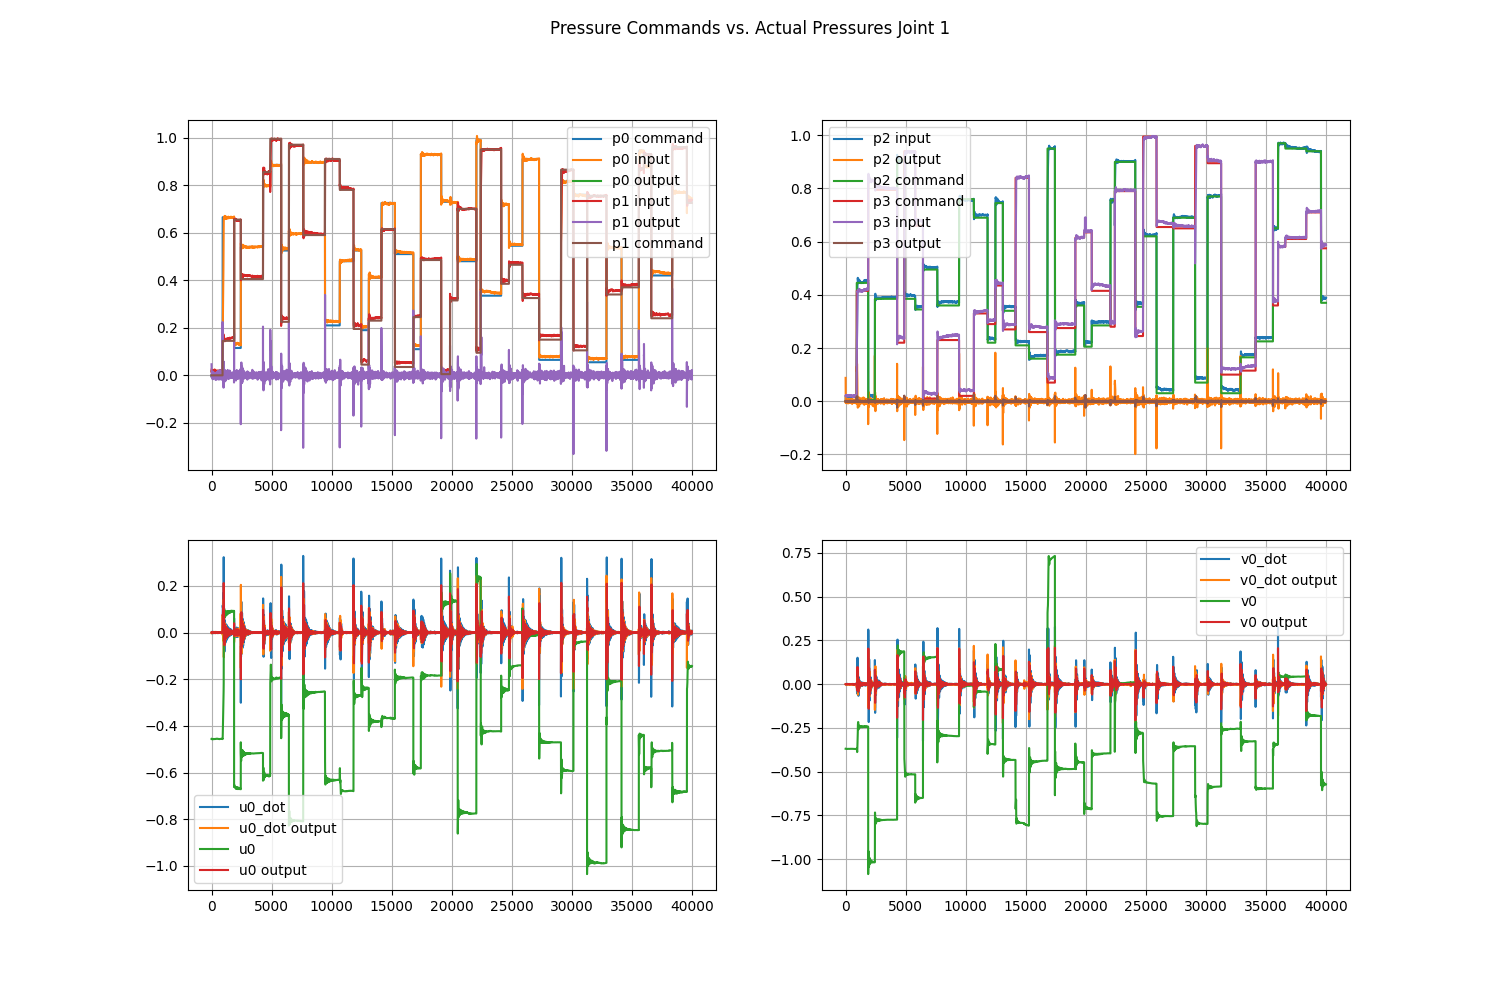

In [3]:
%matplotlib widget

start = 0
end = 40000

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 10)
fig.suptitle('Pressure Commands vs. Actual Pressures Joint 1')
axs[0, 0].plot(arm_input_train_data[start:end,28], label='p0 command')
axs[0, 0].plot(arm_input_train_data[start:end,4], label='p0 input')
axs[0, 0].plot(arm_output_train_data[start:end,4], label='p0 output')

axs[0, 0].plot(arm_input_train_data[start:end,5], label='p1 input')
axs[0, 0].plot(arm_output_train_data[start:end,5], label='p1 output')
axs[0, 0].plot(arm_input_train_data[start:end,29], label='p1 command')

axs[1, 0].plot(arm_input_train_data[start:end,14], label='u0_dot')
axs[1, 0].plot(arm_output_train_data[start:end,14], label='u0_dot output')

axs[1, 0].plot(arm_input_train_data[start:end,20], label='u0')
axs[1, 0].plot(arm_output_train_data[start:end,20], label='u0 output')

axs[0, 1].plot(arm_input_train_data[start:end,6], label='p2 input')
axs[0, 1].plot(arm_output_train_data[start:end,6], label='p2 output')
axs[0, 1].plot(arm_input_train_data[start:end,30], label='p2 command')

axs[0, 1].plot(arm_input_train_data[start:end,31], label='p3 command')
axs[0, 1].plot(arm_input_train_data[start:end,7], label='p3 input')
axs[0, 1].plot(arm_output_train_data[start:end,7], label='p3 output')

axs[1, 1].plot(arm_input_train_data[start:end,15], label='v0_dot')
axs[1, 1].plot(arm_output_train_data[start:end,15], label='v0_dot output')

axs[1, 1].plot(arm_input_train_data[start:end,21], label='v0')
axs[1, 1].plot(arm_output_train_data[start:end,21], label='v0 output')

for ax in axs.flat:
    ax.legend()
    ax.grid(True)


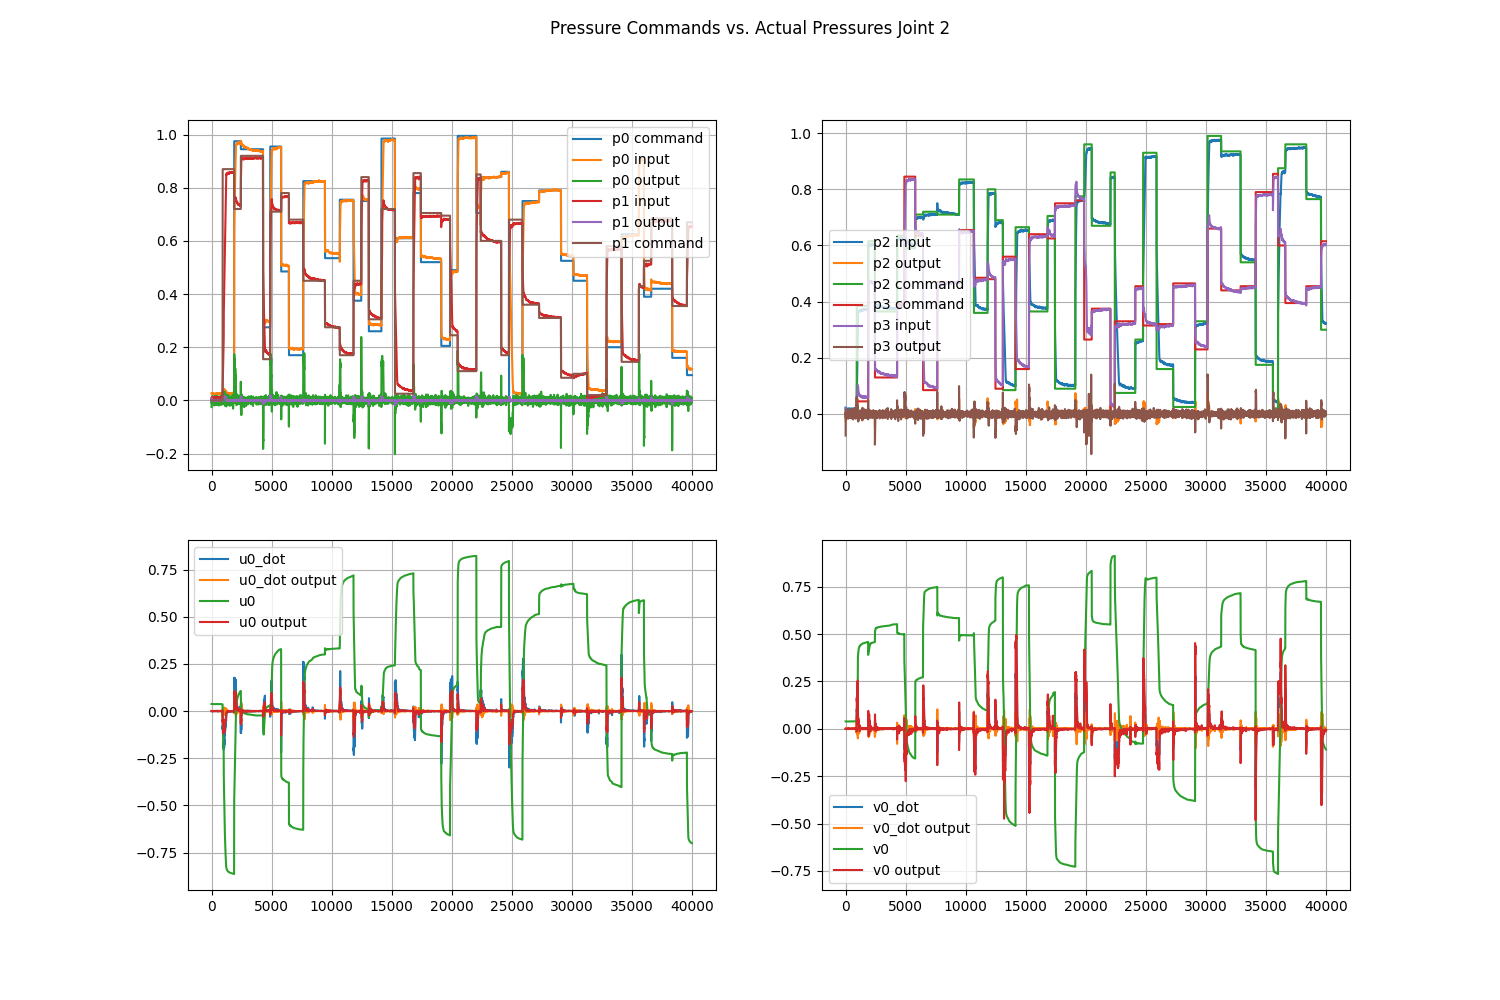

In [12]:
# create subplots for the joint angles
%matplotlib widget

start = 0
end = 40000

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 10)
fig.suptitle('Pressure Commands vs. Actual Pressures Joint 2')
axs[0, 0].plot(arm_input_train_data[start:end,32], label='p0 command')
axs[0, 0].plot(arm_input_train_data[start:end,8], label='p0 input')
axs[0, 0].plot(arm_output_train_data[start:end,8], label='p0 output')

axs[0, 0].plot(arm_input_train_data[start:end,9], label='p1 input')
axs[0, 0].plot(arm_output_train_data[start:end,9], label='p1 output')
axs[0, 0].plot(arm_input_train_data[start:end,33], label='p1 command')

axs[1, 0].plot(arm_input_train_data[start:end,16], label='u0_dot')
axs[1, 0].plot(arm_output_train_data[start:end,16], label='u0_dot output')

axs[1, 0].plot(arm_input_train_data[start:end,22], label='u0')
axs[1, 0].plot(arm_output_train_data[start:end,22], label='u0 output')

axs[0, 1].plot(arm_input_train_data[start:end,10], label='p2 input')
axs[0, 1].plot(arm_output_train_data[start:end,10], label='p2 output')
axs[0, 1].plot(arm_input_train_data[start:end,34], label='p2 command')

axs[0, 1].plot(arm_input_train_data[start:end,35], label='p3 command')
axs[0, 1].plot(arm_input_train_data[start:end,11], label='p3 input')
axs[0, 1].plot(arm_output_train_data[start:end,11], label='p3 output')

axs[1, 1].plot(arm_input_train_data[start:end,17], label='v0_dot')
axs[1, 1].plot(arm_output_train_data[start:end,17], label='v0_dot output')

axs[1, 1].plot(arm_input_train_data[start:end,23], label='v0')
axs[1, 1].plot(arm_output_train_data[start:end,23], label='v0 output')

for ax in axs.flat:
    ax.legend()
    ax.grid(True)
